In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [3]:
data_1 = pd.read_csv("/content/TradeInventories.csv")
data_1

,Date,Inventories
0,1/1/1997,1301161
1,2/1/1997,1307080
2,3/1/1997,1303978
3,4/1/1997,1319740
4,5/1/1997,1327294
...,...,...
259,8/1/2018,2127170
260,9/1/2018,2134172
261,10/1/2018,2144639
262,11/1/2018,2143001


In [4]:
data_1.head()

,Date,Inventories
0,1/1/1997,1301161
1,2/1/1997,1307080
2,3/1/1997,1303978
3,4/1/1997,1319740
4,5/1/1997,1327294


In [5]:
data_1.describe()

,Inventories
count,2.640000e+02
mean,1.714524e+06
std,2.121554e+05
min,1.301161e+06
25%,1.562942e+06
50%,1.687716e+06
75%,1.821569e+06
max,2.158115e+06


In [6]:
data_1['Date']=pd.to_datetime(data_1['Date'])
data_1.index=data_1['Date']
del data_1['Date']




In [7]:
#plotting the time series
data_1.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

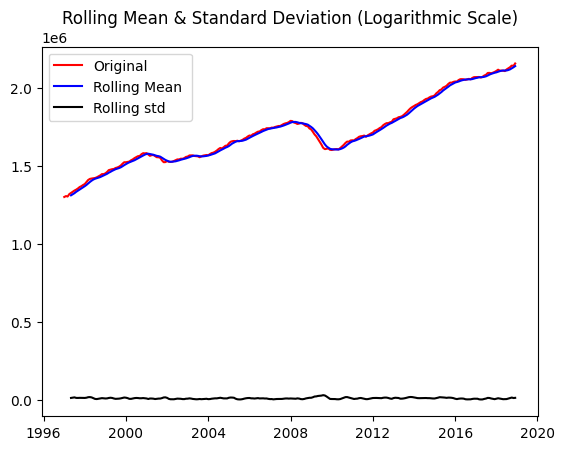

In [18]:
mean_log = data_1.rolling(window =5).mean()
std_log = data_1.rolling(window=5).std()

plt.plot(data_1, color='red', label='Original')
plt.plot(mean_log, color ='blue',label = 'Rolling Mean ')
plt.plot(std_log,  color ='black',label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

<Axes: xlabel='Date'>

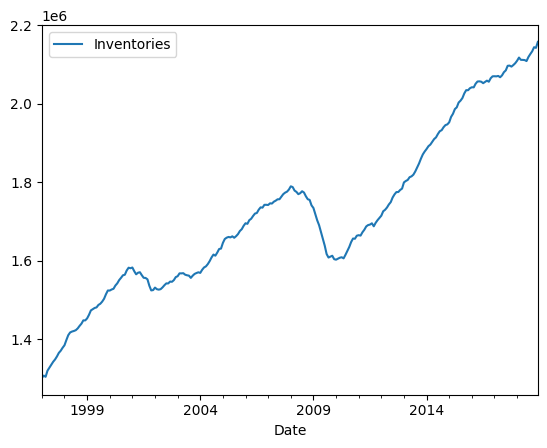

In [8]:
data_1.plot()

In [21]:
#checking the stationarity of the series
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_1['Inventories'])
print(result)

(np.float64(-0.08768390982064447), np.float64(0.9506515302298977), 5, 258, {'1%': np.float64(-3.455952927706342), '5%': np.float64(-2.8728086526320302), '10%': np.float64(-2.572774990685656)}, np.float64(4909.597979003463))


<Axes: xlabel='Date'>

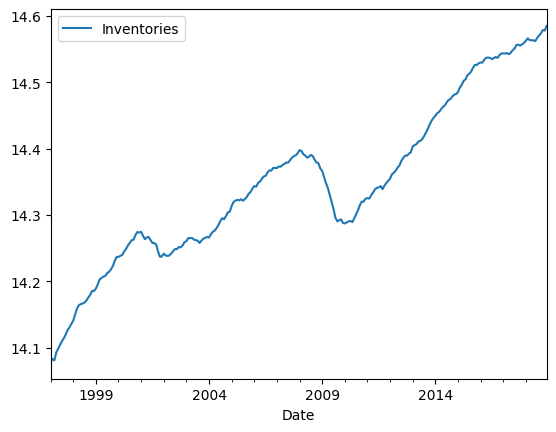

In [22]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data_1)
first_log = first_log.dropna()
first_log.plot()

Stationary


In [40]:
def checkADF(data_1col):
  adf_test_value = adfuller(data_1col)
  dfout = pd.Series(adf_test_value[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

  for key,val in adf_test_value[4].items():
      dfout[f'critical value ({key})']=val
  print(dfout)
  print("\n\n")

  if adf_test_value[1] <= 0.05:
    print("Series is Stationary")
  else:
    print("Series is Non Stationary")

In [42]:
data_1col = data_1['Inventories']
checkADF(data_1col)

ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
dtype: float64



Series is Non Stationary


Transformation -- **Log**


In [43]:
#logrithmic comutation to make the time series stationary
first_log = np.log(data_1)
first_log = first_log.dropna()

In [44]:
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,Inventories
Date,
1997-12-01,0.029790
1998-01-01,0.029243
1998-02-01,0.033219
1998-03-01,0.035571
1998-04-01,0.034558


In [45]:
checkADF(new_data)

ADF test statistic       -3.792321
p-value                   0.002987
# lags used               5.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
dtype: float64



Series is Stationary


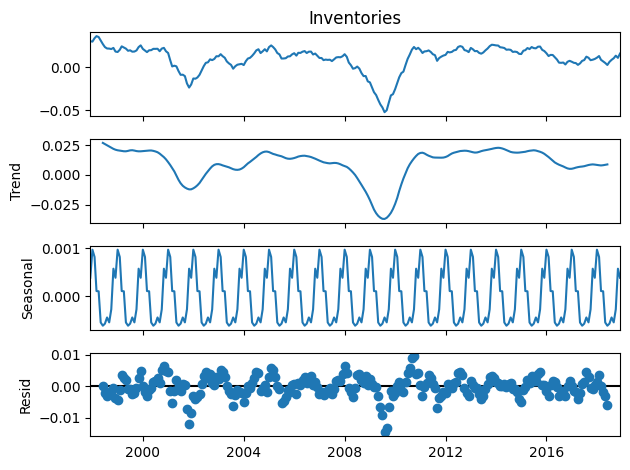

In [46]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['Inventories'].dropna())

decompose_result.plot();

**Apply ACF AND PACF MODEL**

In [48]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [49]:
acf_plot=acf(new_data) # Auto Correlated values
acf_plot

array([ 1.        ,  0.97559081,  0.9344408 ,  0.8815904 ,  0.81884866,
        0.7509489 ,  0.67806984,  0.60353434,  0.52843835,  0.45189941,
        0.37792792,  0.31138085,  0.25181778,  0.20335715,  0.16304411,
        0.12765428,  0.09756443,  0.07487818,  0.05637979,  0.04441991,
        0.03544691,  0.02540263,  0.01228586, -0.00256412, -0.01802158])

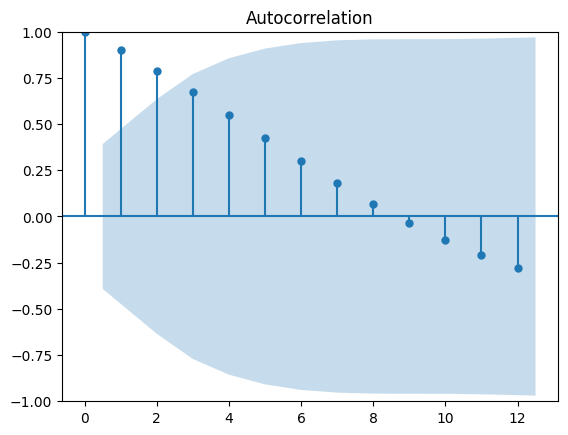

In [50]:
plot_acf(acf_plot); # q = 2

In [53]:
pacf_plot=pacf(new_data)
pacf_plot

array([ 1.        ,  0.9794622 , -0.42947197, -0.17877292, -0.1488756 ,
       -0.01595308, -0.09563844,  0.00101904, -0.03868775, -0.08759499,
        0.04025916,  0.13981599,  0.01997317,  0.13969704, -0.03939453,
       -0.0958172 , -0.03414929,  0.11091756, -0.07946352,  0.07209482,
       -0.09010713, -0.15504773, -0.14512441,  0.09124265,  0.02968751])

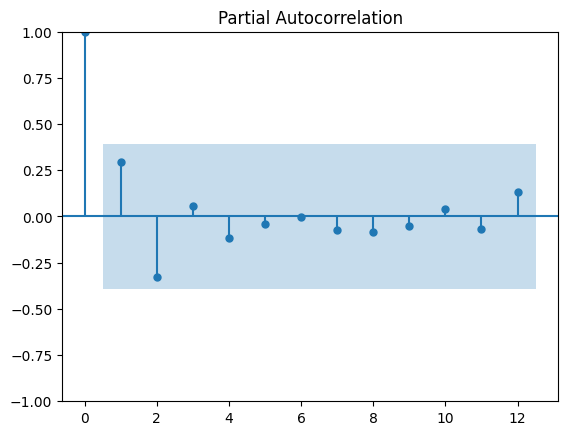

In [55]:
plot_pacf(pacf_plot); #p = 1

Build Model (ML)
Data == same
Clean the data == same
Split the data into training and testing [Randomly] == Sequential
Import the Model (from sklearn.tree import DecisionTreeClassifier) == ARIMA
clf = DecisionTree() == ARIMA(order=(p,d,q))
clf.fit(xtrain, ytrain) == same
clf.predict() == different [forecast]
Evaluate using metrics == Regression - RMSE, MSE, MAE, MAPE

In [56]:
data_1.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


In [57]:
data_1.tail()

,Inventories
Date,
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639
2018-11-01,2143001
2018-12-01,2158115


In [59]:
new_data.head(10)

,Inventories
Date,
1997-12-01,0.029790
1998-01-01,0.029243
1998-02-01,0.033219
1998-03-01,0.035571
1998-04-01,0.034558
1998-05-01,0.030604
1998-06-01,0.026408
1998-07-01,0.022961
1998-08-01,0.021339


In [62]:
data_1.shape

(264, 1)

In [63]:
new_data.shape

(253, 1)

In [72]:
from statsmodels.tsa.arima.model import ARIMA
train = new_data.iloc[:150]['Inventories']
test = new_data.iloc[141:]['Inventories']
print(train.shape, test.shape)

(150,) (112,)


In [69]:
from statsmodels.tsa.arima.model import ARIMA

train = new_data.iloc[:150]['Inventories']
test = new_data.iloc[151:]['Inventories']

model = ARIMA(train, order=(1,0,2))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  150
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 661.560
Date:                Mon, 01 Dec 2025   AIC                          -1313.120
Time:                        18:31:17   BIC                          -1298.067
Sample:                    12-01-1997   HQIC                         -1307.005
                         - 05-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0065      0.007      0.894      0.371      -0.008       0.021
ar.L1          0.9582      0.018     54.170      0.000       0.924       0.993
ma.L1          0.4596      0.083      5.507      0.000       0.296       0.623
ma.L2          0.1598      0.086      1.864      0.062      -0.008       0.328
sigma2      8.418e-06   1.06e-06      7.923      0.000    6.34e-06    1.05e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 2.03
Prob(Q):                              0.60   Prob(JB):                         0.36
Heteroskedasticity (H):               1.10   Skew:                            -0.25
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

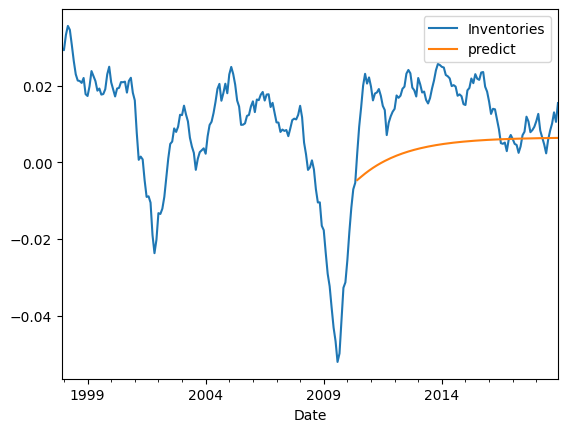

In [73]:
new_data['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['Inventories','predict']].plot() # Between 140 to 151

SARIAMA MODEL

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,10))
model = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: xlabel='Date'>

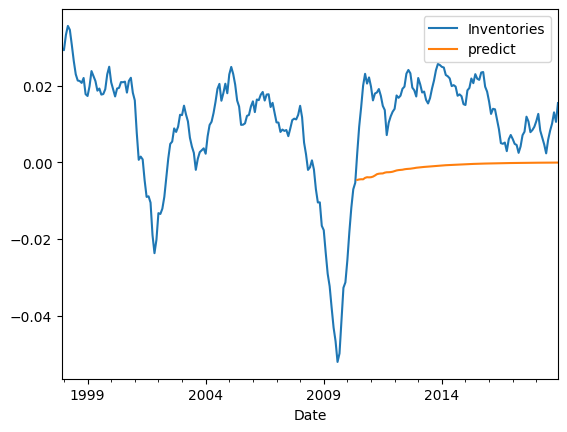

In [81]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['Inventories','predict']].plot()

ARIMA AND SARIMA model are not give the forecating result for further prediction we need to perform RETRANSFORMATION


In [82]:
data_1

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


In [86]:
# prepare data
X = data_1['Inventories'] # Select the column which you want to forecast
X = X.astype('float32')

In [87]:
X

,Inventories
Date,
1997-01-01,1301161.0
1997-02-01,1307080.0
1997-03-01,1303978.0
1997-04-01,1319740.0
1997-05-01,1327294.0
...,...
2018-08-01,2127170.0
2018-09-01,2134172.0
2018-10-01,2144639.0


In [88]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error ## used to evaluated best P,D,Q
from math import sqrt

In [89]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        # difference data
        months_in_year = 12
        diff = difference(history, months_in_year)
        model = ARIMA(diff, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        yhat = inverse_difference(history, yhat, months_in_year)
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [90]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [91]:
# evaluate parameters
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")

In [92]:
p_values

range(0, 2)

In [93]:
# Re-define X with the correct time series data and ensure its type
X = data_1['Inventories']
X = X.astype('float32')

evaluate_models(X, p_values, d_values, q_values)

/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(0, 0, 0) RMSE=63212.608


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(0, 0, 1) RMSE=32403.252


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(0, 1, 0) RMSE=9517.908


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(0, 1, 1) RMSE=8592.258


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 0) RMSE=9543.710


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1) RMSE=8405.316


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(1, 1, 0) RMSE=8222.472


/tmp/ipython-input-3628176420.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  history.append(test[t])


ARIMA(1, 1, 1) RMSE=8057.721
Best ARIMA(1, 1, 1) RMSE=8057.721
